In [16]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy, LinearAnnealedPolicy
from rl.memory import SequentialMemory

In [3]:
from PFRorCSTR import simulator

In [4]:
env = simulator()
nb_actions = env.action_space.n
env.observation_space, env.action_space

(Box(1,), Discrete(2))

In [18]:
# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(nb_actions, activation = 'linear'))
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 34        
Total params: 610
Trainable params: 610
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.05, nb_steps=10000)
memory = SequentialMemory(limit=50000, window_length=1)
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=9,
target_model_update=1e-2, policy=policy, gamma = 0.9)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [31]:
# Okay, now it's time to learn something! We visualize the training here for show, but this slows down training quite a lot. 
hist = dqn.fit(env, nb_steps=5000)

Training for 5000 steps ...
Interval 1 (0 steps performed)
 4995/10000 [=============>................] - ETA: 21s - reward: 0.1899done, took 21.800 seconds


In [66]:
print(hist.history.keys())

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])


In [33]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N

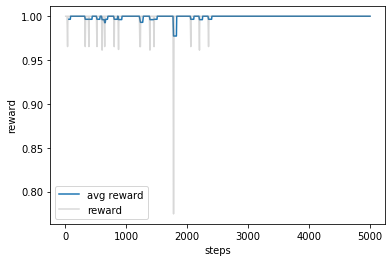

In [34]:
smoothed_rews = running_mean(hist.history['episode_reward'], 10)
plt.plot(hist.history['nb_steps'][-len(smoothed_rews):], smoothed_rews)
plt.plot(hist.history['nb_steps'],hist.history['episode_reward'],color='grey', alpha=0.3)
plt.xlabel("steps")
plt.ylabel("reward")
plt.legend(["avg reward", "reward"])

In [38]:
dqn.test(env, visualize = True)

Testing for 1 episodes ...
choice(1) - conversions: [0, 0.30971084184322467], reactors: [1]
choice(2) - conversions: [0, 0.30971084184322467, 0.6700337959849747], reactors: [1, 0]
choice(3) - conversions: [0, 0.30971084184322467, 0.6700337959849747, 0.9613537829016082], reactors: [1, 0, 1]
choice(4) - conversions: [0, 0.30971084184322467, 0.6700337959849747, 0.9613537829016082, 1], reactors: [1, 0, 1, 1]
Episode 1: reward: 1.000, steps: 4


In [39]:
env.reactor_seq, env.X

([1, 0, 1, 1],
 [0, 0.30971084184322467, 0.6700337959849747, 0.9613537829016082, 1])

In [40]:
y = [] 
x = []
CSTR = []
PFR = []
for i in range(0, 50):
    x.append(i/50)
    CSTR.append(env.equation_solver(0, x[i]))
    PFR.append(env.equation_solver(1, x[i]))

Text(0, 0.5, 'x next')

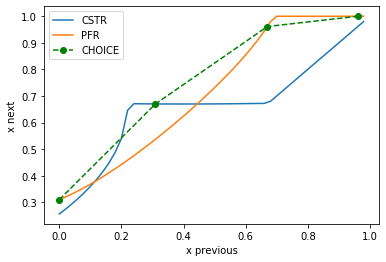

In [41]:
x_sim = env.X[0:-1]
choice = env.X[1:]
plt.plot(x, CSTR)
plt.plot(x, PFR)
plt.plot(x_sim, choice, '--go')
plt.legend(["CSTR", "PFR", "CHOICE"])
plt.xlabel("x previous")
plt.ylabel("x next")

In [32]:
??dqn

In [39]:
??env

In [10]:
??dqn.fit

In [9]:
??dqn.forward

In [24]:
??SequentialMemory